In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import pandas_datareader as web

Using Pandas DataReader , I am trying to Fetch Apple's Stock Price Details as a Dataframe From Yahoo .com

In [7]:
df=yf.download('AAPL', start='2012-01-10', end='2023-07-20')

[*********************100%%**********************]  1 of 1 completed


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.830170,258196400
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.809250,215084800
2012-01-12,15.081429,15.103571,14.955357,15.049643,12.774084,212587200
2012-01-13,14.989286,15.016071,14.952143,14.993214,12.726190,226021600
2012-01-17,15.150000,15.213929,15.105714,15.167857,12.874423,242897200
...,...,...,...,...,...,...
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.283035,41342300
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.432846,41573900
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.728394,50520200


In [9]:
df.shape

(2899, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2899 entries, 2012-01-10 to 2023-07-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2899 non-null   float64
 1   High       2899 non-null   float64
 2   Low        2899 non-null   float64
 3   Close      2899 non-null   float64
 4   Adj Close  2899 non-null   float64
 5   Volume     2899 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 158.5 KB


As You Can SEE , Date has already been set As Index By using Pandas datareader function

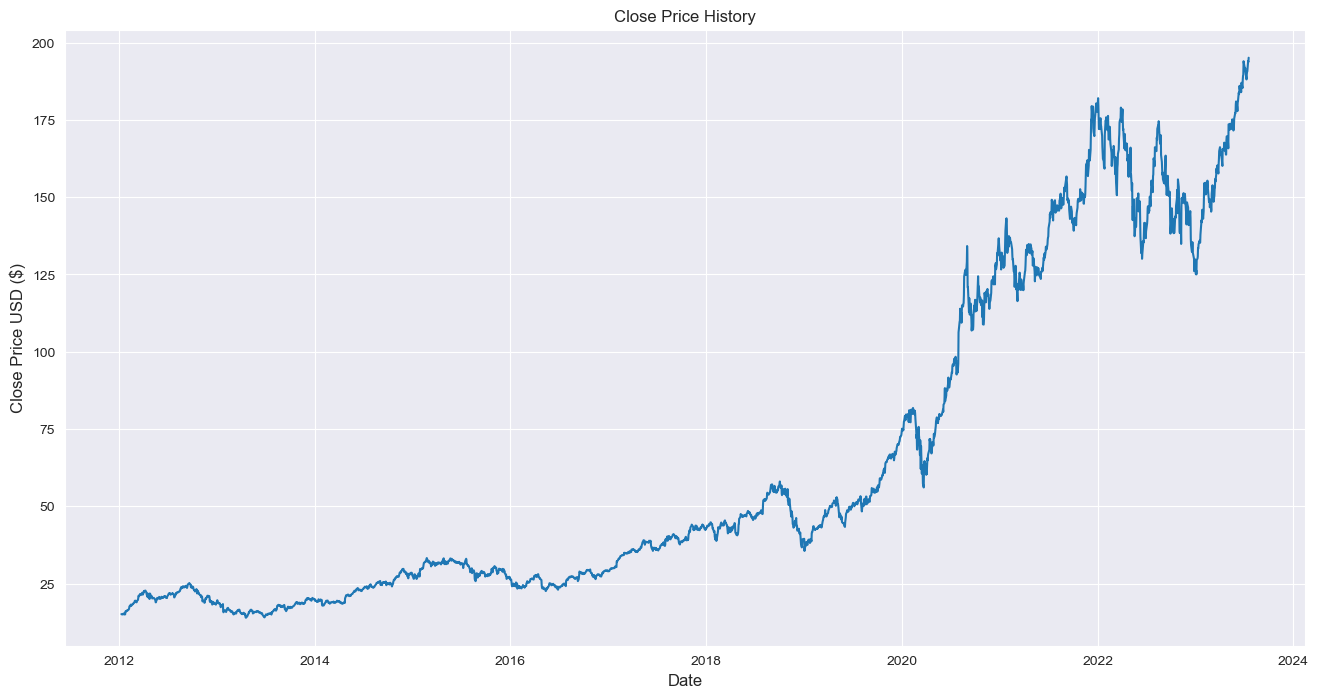

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price USD ($)',fontsize=12)
plt.show()

In [12]:
data_df=df.filter(['Close'])

In [13]:
data_df

,Close
Date,
2012-01-10,15.115714
2012-01-11,15.091071
2012-01-12,15.049643
2012-01-13,14.993214
2012-01-17,15.167857
...,...
2023-07-13,190.539993
2023-07-14,190.690002
2023-07-17,193.990005


In [14]:
data_df=data_df.values          #Converting Into Array For Model Training Purposes

In [15]:
data_df

array([[ 15.11571407],
       [ 15.09107113],
       [ 15.04964256],
       ...,
       [193.99000549],
       [193.72999573],
       [195.1000061 ]])

In [16]:
len(data_df)

2899

### I am Taking My Data as 80% For Training and 20% For Testing :

In [17]:
train_index=int(len(data_df)*0.8)

In [18]:
train_index

2319

In [19]:
train_data=data_df[:train_index]

In [20]:
train_data

array([[ 15.11571407],
       [ 15.09107113],
       [ 15.04964256],
       ...,
       [120.58999634],
       [121.20999908],
       [121.38999939]])

In [21]:
test_data=data_df[train_index:]

In [23]:
test_data

array([[119.90000153],
       [122.15000153],
       [123.        ],
       [125.90000153],
       [126.20999908],
       [127.90000153],
       [130.36000061],
       [133.        ],
       [131.24000549],
       [134.42999268],
       [132.02999878],
       [134.5       ],
       [134.16000366],
       [134.83999634],
       [133.11000061],
       [133.5       ],
       [131.94000244],
       [134.32000732],
       [134.72000122],
       [134.38999939],
       [133.58000183],
       [133.47999573],
       [131.46000671],
       [132.53999329],
       [127.84999847],
       [128.1000061 ],
       [129.74000549],
       [130.21000671],
       [126.84999847],
       [125.91000366],
       [122.76999664],
       [124.97000122],
       [127.44999695],
       [126.26999664],
       [124.84999847],
       [124.69000244],
       [127.30999756],
       [125.43000031],
       [127.09999847],
       [126.90000153],
       [126.84999847],
       [125.27999878],
       [124.61000061],
       [124

In [24]:
len(train_data)

2319

In [25]:
len(test_data)

580

## Scaling :

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))     #To scale only between 0 to 1

In [28]:
scaled_train_set=scaler.fit_transform(train_data)

### Making X_train , y_train

i am gonna take 60 days or 2 months as my training data and i will try to forecast 61st value 

In [30]:


x_train=[]
y_train = []


for i in range(100,len(scaled_train_set)):
    x_train.append(scaled_train_set[i-100:i,0])
    y_train.append(scaled_train_set[i,0])
    

In [31]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [32]:
x_train

array([[0.00904103, 0.00885031, 0.00852969, ..., 0.05214002, 0.05174201,
        0.04711507],
       [0.00885031, 0.00852969, 0.00809297, ..., 0.05174201, 0.04711507,
        0.04802719],
       [0.00852969, 0.00809297, 0.00944457, ..., 0.04711507, 0.04802719,
        0.04762364],
       ...,
       [0.78454094, 0.73454579, 0.73384923, ..., 0.8469962 , 0.8404179 ,
        0.82145685],
       [0.73454579, 0.73384923, 0.74677372, ..., 0.8404179 , 0.82145685,
        0.82532645],
       [0.73384923, 0.74677372, 0.78167742, ..., 0.82145685, 0.82532645,
        0.83012476]])

In [33]:
y_train

array([0.04802719, 0.04762364, 0.05000899, ..., 0.82532645, 0.83012476,
       0.83151782])

In [34]:
len(x_train)

2219

In [35]:
len(y_train)

2219

Reshape the data to be 3-dimensional in the form 
[number of samples, number of time steps, and number of features].
The LSTM model is expecting a 3-dimensional data set.

In [30]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [36]:
x_train.shape

(2219, 100)

### Building Model :

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(x_train,y_train,verbose=1,epochs=100,batch_size=64)

Epoch 1/100
35/35 [==============================] - 6s 81ms/step - loss: 0.0127
Epoch 2/100
35/35 [==============================] - 3s 80ms/step - loss: 6.3561e-04
Epoch 3/100
35/35 [==============================] - 3s 77ms/step - loss: 4.9999e-04
Epoch 4/100
35/35 [==============================] - 3s 100ms/step - loss: 5.0868e-04
Epoch 5/100
35/35 [==============================] - 4s 101ms/step - loss: 4.6151e-04
Epoch 6/100
35/35 [==============================] - 3s 98ms/step - loss: 4.6903e-04
Epoch 7/100
35/35 [==============================] - 4s 103ms/step - loss: 4.4428e-04
Epoch 8/100
35/35 [==============================] - 4s 115ms/step - loss: 4.6222e-04
Epoch 9/100
35/35 [==============================] - 4s 100ms/step - loss: 4.1032e-04
Epoch 10/100
35/35 [==============================] - 4s 102ms/step - loss: 3.9743e-04
Epoch 11/100
35/35 [==============================] - 4s 100ms/step - loss: 4.2501e-04
Epoch 12/100
35/35 [==============================] - 4s 103

In [42]:
losses=pd.DataFrame(model.history.history)

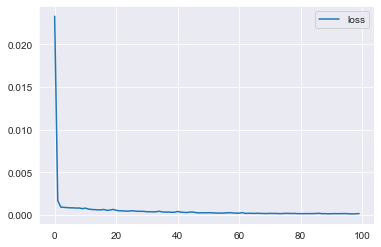

In [38]:
losses.plot()

## Creating Test set:

In [43]:
test_dataset=data_df[train_index-100:,:]

In [44]:
len(test_dataset)

680

In [45]:
scaled_test_set=scaler.fit_transform(test_dataset)

In [46]:
scaled_test_set

array([[0.        ],
       [0.05327184],
       [0.10146463],
       [0.09744861],
       [0.06945425],
       [0.06532009],
       [0.10689812],
       [0.10359079],
       [0.10418142],
       [0.11646587],
       [0.10571694],
       [0.08965268],
       [0.09685798],
       [0.0815024 ],
       [0.04027871],
       [0.05587049],
       [0.06602878],
       [0.07264344],
       [0.10170092],
       [0.14505077],
       [0.14930308],
       [0.14764941],
       [0.13949914],
       [0.15721707],
       [0.16465857],
       [0.13394751],
       [0.15119295],
       [0.14138909],
       [0.13394751],
       [0.2060004 ],
       [0.20517357],
       [0.2156862 ],
       [0.1915899 ],
       [0.21013457],
       [0.25324831],
       [0.24238133],
       [0.25431134],
       [0.31006377],
       [0.28856593],
       [0.27498226],
       [0.26281596],
       [0.22407277],
       [0.24297178],
       [0.19088112],
       [0.24190875],
       [0.25525632],
       [0.21899353],
       [0.216

In [47]:
len(scaled_test_set)

680

In [48]:
x_test=[]
y_test=test_data

for i in range(100,len(scaled_test_set)):
    x_test.append(scaled_test_set[i-100:i,0])
    

In [49]:
x_test=np.array(x_test)

In [50]:
x_test

array([[0.        , 0.05327184, 0.10146463, ..., 0.11989125, 0.1272147 ,
        0.12934085],
       [0.05327184, 0.10146463, 0.09744861, ..., 0.1272147 , 0.12934085,
        0.11174107],
       [0.10146463, 0.09744861, 0.06945425, ..., 0.12934085, 0.11174107,
        0.13831796],
       ...,
       [0.44932662, 0.45440585, 0.4601936 , ..., 0.93704227, 0.94613734,
        0.94790924],
       [0.45440585, 0.4601936 , 0.42841959, ..., 0.94613734, 0.94790924,
        0.98688872],
       [0.4601936 , 0.42841959, 0.44271195, ..., 0.94790924, 0.98688872,
        0.9838175 ]])

In [51]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [52]:
x_test.shape

(580, 100, 1)

In [53]:
len(x_test
   )

580

## Predictions :

In [54]:
pred=model.predict(x_test)

19/19 [==============================] - 1s 16ms/step


In [55]:
pred=scaler.inverse_transform(pred)

In [56]:
pred

array([[120.60086 ],
       [120.41569 ],
       [120.739426],
       [121.51633 ],
       [123.15978 ],
       [124.82015 ],
       [126.44557 ],
       [128.36891 ],
       [130.73978 ],
       [131.68327 ],
       [132.8736  ],
       [132.71933 ],
       [133.1195  ],
       [133.46552 ],
       [133.93765 ],
       [133.49615 ],
       [133.11996 ],
       [132.27545 ],
       [132.71866 ],
       [133.63586 ],
       [134.14378 ],
       [133.88968 ],
       [133.43512 ],
       [132.18224 ],
       [131.68822 ],
       [129.59897 ],
       [127.97606 ],
       [127.87563 ],
       [128.557   ],
       [127.85572 ],
       [126.539215],
       [124.37997 ],
       [123.51314 ],
       [124.37025 ],
       [125.200615],
       [125.135925],
       [124.66396 ],
       [125.15546 ],
       [125.23141 ],
       [125.6474  ],
       [126.01354 ],
       [126.19307 ],
       [125.665375],
       [124.810936],
       [124.05131 ],
       [123.88816 ],
       [123.53613 ],
       [124.0

In [57]:
rmse=np.sqrt(np.mean(((pred-y_test)**2)))
rmse

3.0223896450963172

## Visualising Plots :

In [58]:
data=df.filter(['Close'])

In [59]:
data

,Close
Date,
2012-01-10,15.115714
2012-01-11,15.091071
2012-01-12,15.049643
2012-01-13,14.993214
2012-01-17,15.167857
...,...
2023-07-13,190.539993
2023-07-14,190.690002
2023-07-17,193.990005


In [60]:
train_d=data[:train_index]
test_d=data[train_index:]
pred_d=pred

In [61]:
train_d

,Close
Date,
2012-01-10,15.115714
2012-01-11,15.091071
2012-01-12,15.049643
2012-01-13,14.993214
2012-01-17,15.167857
...,...
2021-03-23,122.540001
2021-03-24,120.089996
2021-03-25,120.589996


In [62]:

test_d

,Close
Date,
2021-03-30,119.900002
2021-03-31,122.150002
2021-04-01,123.000000
2021-04-05,125.900002
2021-04-06,126.209999
...,...
2023-07-13,190.539993
2023-07-14,190.690002
2023-07-17,193.990005


In [63]:
pred

array([[120.60086 ],
       [120.41569 ],
       [120.739426],
       [121.51633 ],
       [123.15978 ],
       [124.82015 ],
       [126.44557 ],
       [128.36891 ],
       [130.73978 ],
       [131.68327 ],
       [132.8736  ],
       [132.71933 ],
       [133.1195  ],
       [133.46552 ],
       [133.93765 ],
       [133.49615 ],
       [133.11996 ],
       [132.27545 ],
       [132.71866 ],
       [133.63586 ],
       [134.14378 ],
       [133.88968 ],
       [133.43512 ],
       [132.18224 ],
       [131.68822 ],
       [129.59897 ],
       [127.97606 ],
       [127.87563 ],
       [128.557   ],
       [127.85572 ],
       [126.539215],
       [124.37997 ],
       [123.51314 ],
       [124.37025 ],
       [125.200615],
       [125.135925],
       [124.66396 ],
       [125.15546 ],
       [125.23141 ],
       [125.6474  ],
       [126.01354 ],
       [126.19307 ],
       [125.665375],
       [124.810936],
       [124.05131 ],
       [123.88816 ],
       [123.53613 ],
       [124.0

In [64]:
test_d['Predictions']=pred

C:\Users\djsma\AppData\Local\Temp\ipykernel_24796\3104080141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d['Predictions']=pred


In [65]:
test_d

,Close,Predictions
Date,,
2021-03-30,119.900002,120.600861
2021-03-31,122.150002,120.415688
2021-04-01,123.000000,120.739426
2021-04-05,125.900002,121.516327
2021-04-06,126.209999,123.159782
...,...,...
2023-07-13,190.539993,187.821823
2023-07-14,190.690002,188.483429
2023-07-17,193.990005,188.496414


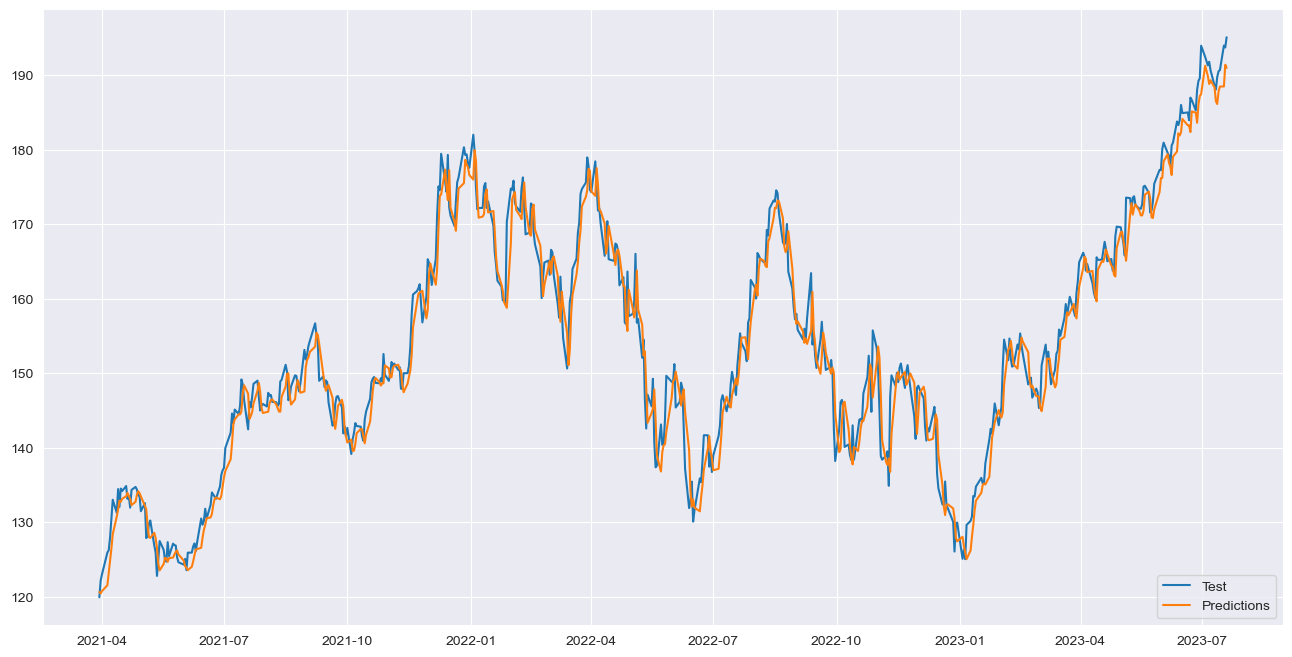

In [66]:
plt.figure(figsize=(16,8))
plt.plot(test_d[['Close','Predictions']])
plt.legend(['Test', 'Predictions'], loc='lower right')

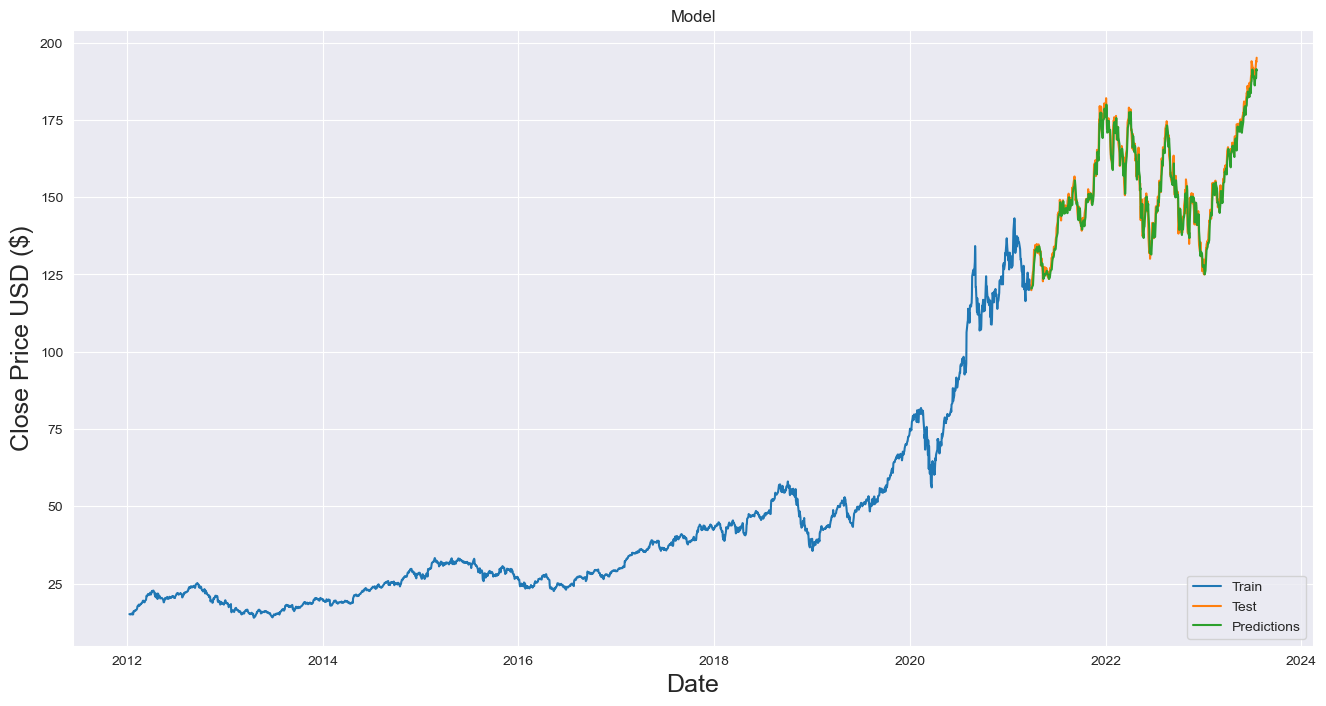

In [67]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train_d['Close'])
plt.plot(test_d[['Close','Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')


## Forecasting Into Unknown Future [ For Next 30 Days ] :

In [68]:
test_d

,Close,Predictions
Date,,
2021-03-30,119.900002,120.600861
2021-03-31,122.150002,120.415688
2021-04-01,123.000000,120.739426
2021-04-05,125.900002,121.516327
2021-04-06,126.209999,123.159782
...,...,...
2023-07-13,190.539993,187.821823
2023-07-14,190.690002,188.483429
2023-07-17,193.990005,188.496414


In [93]:
len(test_d)

580

In [92]:
#In order to forecast for next 30 days , i have to take last or past 60 days to make that prediction
424-100

324

In [71]:
test_d.iloc[324:,1:2]

,Predictions
Date,
2022-07-13,145.753174
2022-07-14,145.376221
2022-07-15,147.018539
2022-07-18,149.265686
2022-07-19,148.406937
...,...
2023-07-13,187.821823
2023-07-14,188.483429
2023-07-17,188.496414


In [72]:
xi=scaler.fit_transform(test_d.iloc[324:,1:2])

In [73]:
xi=xi.reshape(1,-1)

In [74]:
xi.shape

(1, 256)

In [75]:
xi

array([[0.3122133 , 0.3065349 , 0.33127487, 0.36512625, 0.3521899 ,
        0.37391913, 0.40928614, 0.44769728, 0.44872797, 0.42935765,
        0.4044088 , 0.44832194, 0.48081315, 0.5436431 , 0.55535495,
        0.5328876 , 0.5880729 , 0.6078249 , 0.60299885, 0.59292877,
        0.5906192 , 0.64228094, 0.6495551 , 0.68934286, 0.71083295,
        0.7099341 , 0.72564065, 0.7236999 , 0.68935597, 0.6326798 ,
        0.6208869 , 0.6277386 , 0.6631471 , 0.5883001 , 0.54026043,
        0.5020553 , 0.4758941 , 0.48093307, 0.46013677, 0.43749774,
        0.44669187, 0.43525088, 0.46170866, 0.54044235, 0.46001685,
        0.43571103, 0.40190065, 0.37488806, 0.4097718 , 0.45805657,
        0.44203198, 0.41729605, 0.3833319 , 0.3750075 , 0.3873037 ,
        0.3761896 , 0.29547966, 0.2164911 , 0.22237527, 0.2760464 ,
        0.31490028, 0.31829846, 0.26201737, 0.22834504, 0.20501554,
        0.19153297, 0.2268399 , 0.2186271 , 0.23712718, 0.26456058,
        0.28010023, 0.2794839 , 0.30863178, 0.34

In [76]:
temp_input=list(xi)
temp_input=temp_input[0].tolist()       #To convert our array to list

In [77]:
len(temp_input)

256

In [78]:
#Prediction Loop for NEXT 30 Days :

In [82]:
#This Loop Will Run For 30 Times [ Because we want our data for next 30 days ]

list_output=[]                                          #List To Store Our values
n_steps=255                                               #Number of Days To Look Back
i=0

while(i<30):
    
    
    if(len(temp_input)>255):
        xi=np.array(temp_input[1:])
        xi=xi.reshape(1,-1)
        xi=xi.reshape((1,n_steps,1))
        yhat=model.predict(xi,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
        
    else:
        xi=xi.reshape((1,n_steps,1))
        yhat=model.predict(xi,verbose=0)
        temp_input.extend(yhat[0].tolist())
        list_output.extend(yhat.tolist())
        i=i+1
        
print(list_output)

[[0.95933997631073], [0.9267966151237488], [0.8973749876022339], [0.8722732067108154], [0.8513911366462708], [0.8338142037391663], [0.818544328212738], [0.804729163646698], [0.7917578220367432], [0.7792631983757019], [0.7670778632164001], [0.75517338514328], [0.7436052560806274], [0.7324658036231995], [0.7218520045280457], [0.7118478417396545], [0.7025136351585388], [0.6938848495483398], [0.6859742999076843], [0.6787762641906738], [0.6722713708877563], [0.666430652141571], [0.6612193584442139], [0.6565989255905151], [0.6525294780731201], [0.6489697098731995], [0.6458787322044373], [0.6432148814201355], [0.6409372687339783], [0.6390041708946228]]


In [83]:
len(list_output)

30

In [105]:
#for Visualising Plot 

day_past=np.arange(1,101)                #100 Indexes for previous or past 100 days
day_pred=np.arange(101,131)              #30indexes for next 30 predicted days 

In [106]:
len(df)

2899

In [107]:
2899-100

2799

In [108]:
dfc=df[2799:]

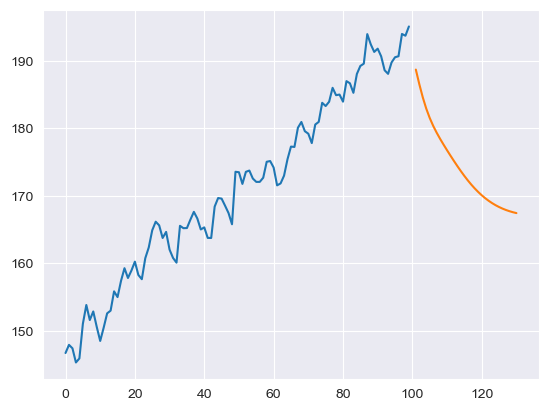

In [109]:
plt.plot(list(dfc['Close']))
plt.plot(day_pred,scaler.inverse_transform(list_output))

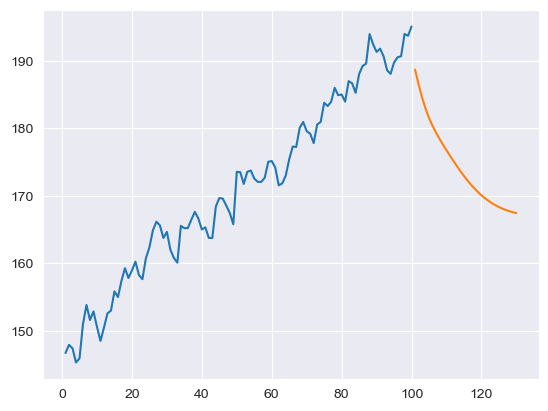

In [110]:
plt.plot(day_past,list(dfc['Close']))
plt.plot(day_pred,scaler.inverse_transform(list_output))

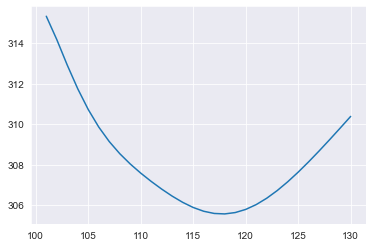

In [83]:
plt.plot(day_pred,scaler.inverse_transform(list_output))